In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston

# boston preços de casas
boston_dataset = load_boston()
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [8]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [9]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [11]:
df_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
df_boston["MEDV"] = boston_dataset.target

In [13]:
# Somar linhas em branco por coluna para verificar se existem dados faltantes
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

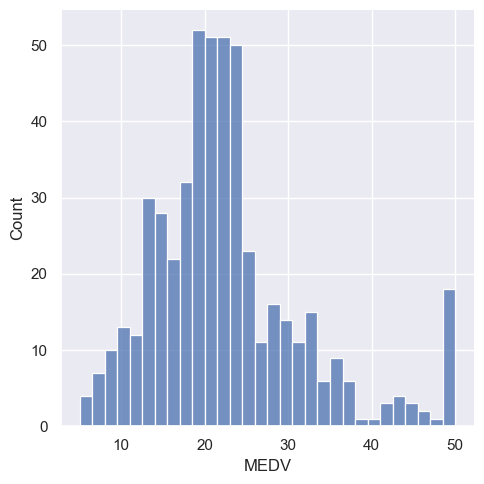

In [15]:

sns.set(rc={"figure.figsize":(11.7,8.27)})

sns.displot(df_boston["MEDV"], bins=30)

<AxesSubplot: >

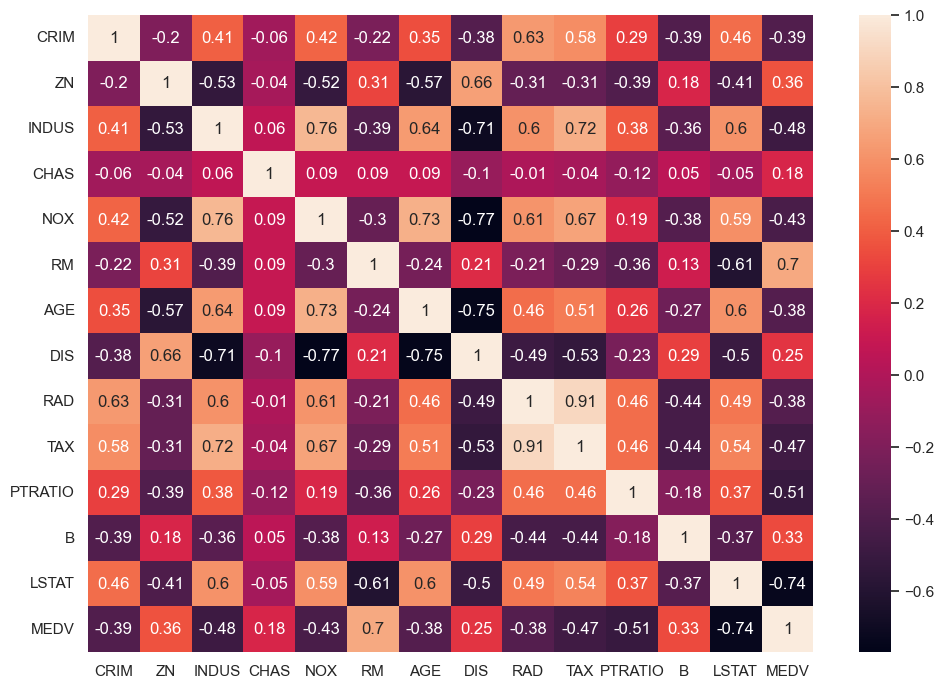

In [17]:
# Calcule a correlação em pares para todas as colunas
Correlation_matrix = df_boston.corr().round(2)
# criar matriz com mapa de calor "matrix heatmap"
sns.heatmap(data=Correlation_matrix, annot=True)

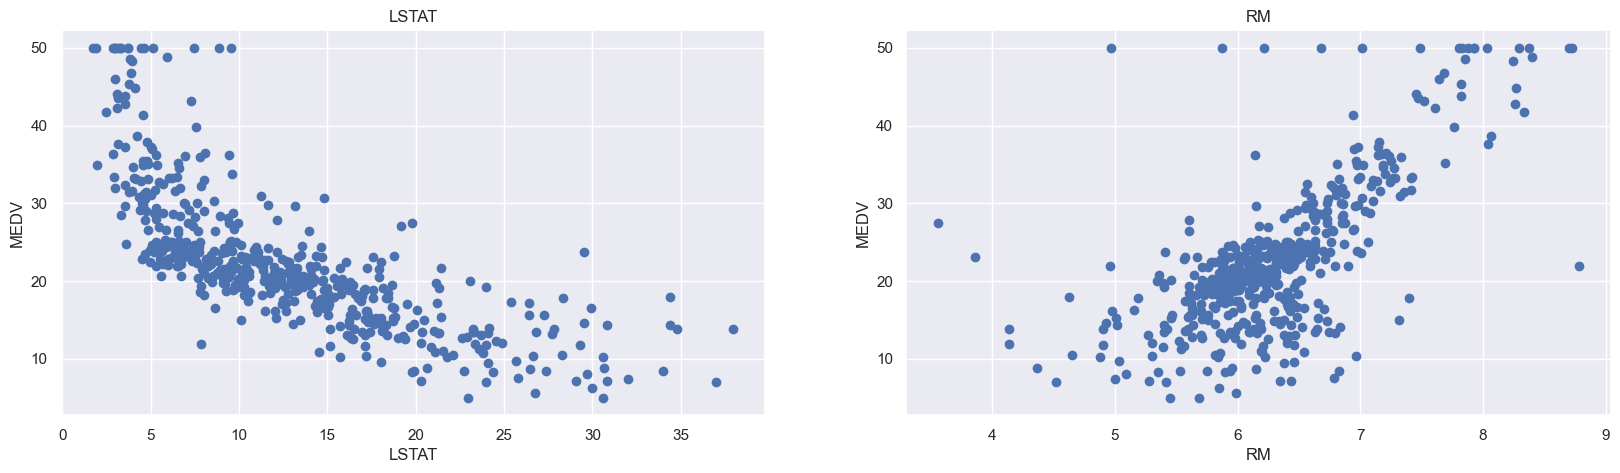

In [20]:
# Gráfico de correlação em relação as médias das colunas LSTAT E RM q possuem forte correlação
# do Lado esquerdo negativa e do direito positiva
plt.figure(figsize=(20,5))
features = ["LSTAT", "RM"]
target = df_boston["MEDV"]

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df_boston[col]
    y=target
    plt.scatter(x, y, marker="o")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("MEDV")

In [22]:
# Preparo dos dados para treinamento
X = pd.DataFrame(np.c_[df_boston["LSTAT"], df_boston["RM"]], columns=["LSTAT", "RM"])
Y= df_boston["MEDV"]

In [23]:
from sklearn.model_selection import train_test_split
#  Dividir os dados em 4 dataSets de x/y-treino 80% e x-y-teste 20%.
# atribuir estado aleatório a qualquer valor, isso garante consistência.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Modelo de Aprendizado
# Modelo de treino

y_train_predict = lin_model.predict(X_train)
rmse= (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model Performance for taining set")
print("-------------------------------------")
print("RMSE is {}" .format(rmse))
print("R2 score is {}" .format(r2))

The model Performance for taining set
-------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


In [28]:
# Modelo para teste
y_test_predict = lin_model.predict(X_test)
# raiz do erro quadrático médio do modelo
rmse= (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# pontuação ao quadrado do modelo
r2 = r2_score(Y_test, y_test_predict)

print("The model Performance for taining set")
print("-------------------------------------")
print("RMSE is {}" .format(rmse))
print("R2 score is {}" .format(r2))

The model Performance for taining set
-------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952
